## Fitting Logistic Regression Model

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

In [141]:
X = pd.read_csv('Data/Crash_X.csv')
y = pd.read_csv('Data/Crash_y.csv')

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [143]:
clf = LogisticRegression(C=10)
clf.fit(X_train, y_train.values.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Help with interpretting the model:
* [yhat blog](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html)
* [pure python implementation](http://blog.smellthedata.com/2009/06/python-logistic-regression-with-l2.html)
* [this stack exchange](https://stats.stackexchange.com/questions/221622/interpreting-multinomial-logistic-regression-in-scikit-learn)

## Classification Report

In [144]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93     18888
          1       0.83      0.60      0.70      5195

avg / total       0.88      0.89      0.88     24083



## Confusion Matrix

In [145]:
confusion_matrix(y_test, y_pred).T

array([[18258,  2071],
       [  630,  3124]])

## ROC Curve

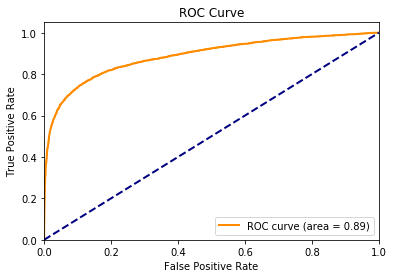

In [146]:
y_score = clf.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [147]:
coefficients = pd.DataFrame(clf.coef_.flatten(), index=X.columns)

In [148]:
# Allows for inspection of Logistic Regression Coefficients
coefficients

,0
DRIVER1AGE,-0.087963
DRIVER2AGE,-0.123442
NOATYPEINJ,0.118297
NOBTYPEINJ,0.137023
NOCTYPEINJ,0.251605
NUMOFINJ,0.297708
NUMOFOCCUP,-2.660737
NUMOFUNINJ,2.710044
NUMOFVEHIC,0.133764
SPEEDLIMIT,-0.007566


## PCA

The two best explanations of PCA I've found online are:
1. [This is the best](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)
2. [This is a close second](https://stats.stackexchange.com/questions/217995/what-is-an-intuitive-explanation-for-how-pca-turns-from-a-geometric-problem-wit)

In [26]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=100)
X_reduced = pca.fit_transform(X)

In [93]:
X_reduced.shape

(72977, 100)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)

In [95]:
clf = LogisticRegression(C=10)
clf.fit(X_train, y_train.values.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93     18888
          1       0.83      0.60      0.70      5195

avg / total       0.88      0.89      0.88     24083



In [123]:
component_vals = []
roc_auc_vals = []
pca_vals = range(10,150, 10)

for components in pca_vals:
    pca = PCA(n_components=components)
    X_reduced = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)
    clf = LogisticRegression(C=10)
    clf.fit(X_train, y_train.values.ravel())
    
    y_score = clf.decision_function(X_test)
    # Compute ROC curve and ROC area for each class
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    component_vals.append(components)
    roc_auc_vals.append(roc_auc)

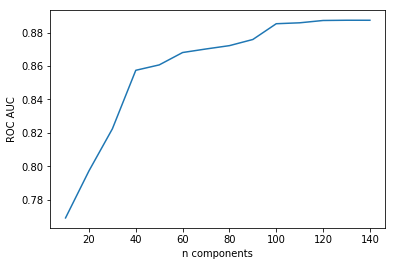

In [124]:
plt.plot(component_vals, roc_auc_vals)
plt.xlabel('n components')
plt.ylabel('ROC AUC')
plt.show()

As depicted by the plot above, we can achieve the same ROC AUC with 100 components as with the full 170 components. IF we are willing to drop 3 percentage points, we can even use 40 components!

## Reduced Components: Scikit-Learn v. Statsmodel

In [157]:
pca = PCA(n_components=40)
X_reduced = pca.fit_transform(X)

In [159]:
pd.DataFrame(X_reduced).to_csv('Data/Crash_X_reduced.csv', index=False)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)

#### Statsmodel

In [161]:
import statsmodels.api as sm
est = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.493157
         Iterations 7


In [162]:
y_pred = est.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))

             precision    recall  f1-score   support

          0       0.92      0.84      0.88     18888
          1       0.55      0.72      0.63      5195

avg / total       0.84      0.81      0.82     24083



#### Scikit-Learn

In [163]:
clf = LogisticRegression(C=10)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92     18888
          1       0.82      0.51      0.63      5195

avg / total       0.87      0.87      0.86     24083

